In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np

import configuration
import gather_results

def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.0f M' % (x*1e-6)

def generate_plot(argspec, outstat, throughput_data, pp):
    plt.title('libcuckoo vs. TBB:  %s (%s)' % (argspec, outstat))

    # Set up the y-axis (which is stored as xs)
    tables = throughput_data['xs']
    y_pos = np.arange(len(tables))

    # Set up the x-axis
    plt.xlabel(throughput_data['y_axis'])
    xvalues = throughput_data['ys']
    plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(millions))

    plt.barh(y_pos, xvalues, align='center', alpha=0.4)
    plt.yticks(y_pos, tables)

    metadata_text = r'''
$\bf{Command\ Line}$ =
 %s
$\bf{Machine\ Type}$ = ???

$\bf{KEY}$   = %s
$\bf{VALUE}$ = %s
''' % (
    all_params.args[argspec].replace(' --', '\n --'),
    key,
    value
    )
    metadata = plt.text(1.05, 1.0, metadata_text,
                        transform=plt.gca().transAxes, verticalalignment='top', family='monospace')

    if pp:
        pp.savefig(bbox_extra_artists=(metadata,), bbox_inches='tight')

    plt.show()

In [2]:
# Get the data
all_params = configuration.AllParameters()
all_data = gather_results.gather_data()

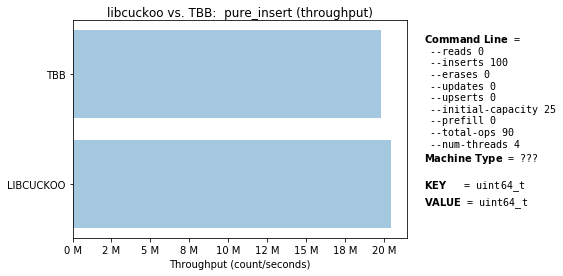

In [3]:
### Example to generate a single graph with specific parameters

# Setup PDF output, one page for each graph (call to savefig)
# Set 'pp' to False if you don't want PDF output
pp = PdfPages('benchmarks.pdf')
# pp = False

argspec = 'pure_insert'
key = 'uint64_t'
value = 'uint64_t'
outstat = 'throughput'

throughput_data = gather_results.get_stat(all_params, all_data, argspec, key, value, outstat)
generate_plot(argspec, outstat, throughput_data, pp)

# Close out the PDF
if pp:
    pp.close()

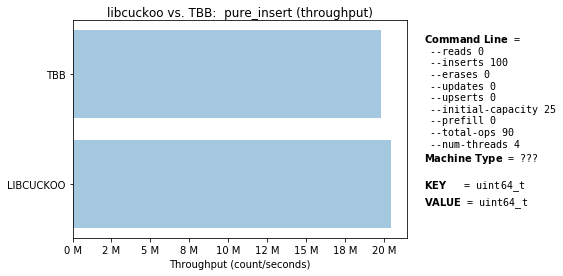

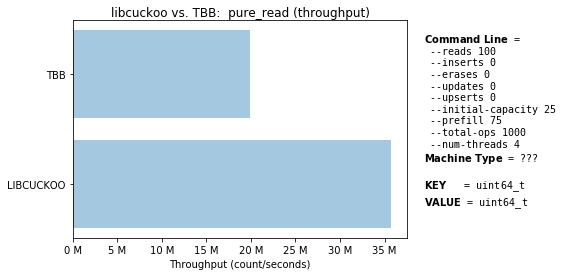

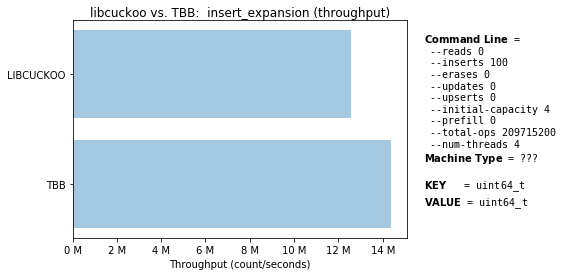

In [5]:
### Generate all graphs from the run

# Setup PDF output, one page for each graph (call to savefig)
# Set 'pp' to False if you don't want PDF output
pp = PdfPages('benchmarks_all.pdf')
# pp = False

keys = all_params.keys
values = all_params.values
experiments = all_params.args.keys()

for k in keys:
    for v in values:
        for e in experiments:
            # print(k, v, e)
            outstat = 'throughput'
            throughput_data = gather_results.get_stat(all_params, all_data, e, k, v, outstat)
            generate_plot(e, outstat, throughput_data, pp)
            
# Close out the PDF
if pp:
    pp.close()